Importing all the required libraries and data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 25,10
from google.colab import drive
drive.mount('gdrive')
import os

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [36]:
path = '/content/gdrive/My Drive/intern_dataset'
data_file = os.path.join(path, "boston_train.csv")
boston = pd.read_csv(data_file)



In [37]:
boston.head()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


Evaluting x and y from given dataset

In [38]:
x = boston.iloc[:,:-1]
x

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [39]:
x.drop(['ID'],axis = 1, inplace = True)
x = (x - x.mean())/x.std()
# x = np.c_[np.ones(x.shape[0]), x]

In [40]:
x.shape

(333, 13)

In [41]:
x.ndim

2

In [42]:
y = boston[['medv']]
y

,medv
0,24.0
1,21.6
2,33.4
3,36.2
4,22.9
...,...
328,17.5
329,22.4
330,20.6
331,23.9


In [43]:
y.shape

(333, 1)

In [44]:
y.ndim

2

Text(0, 0.5, '$y$')

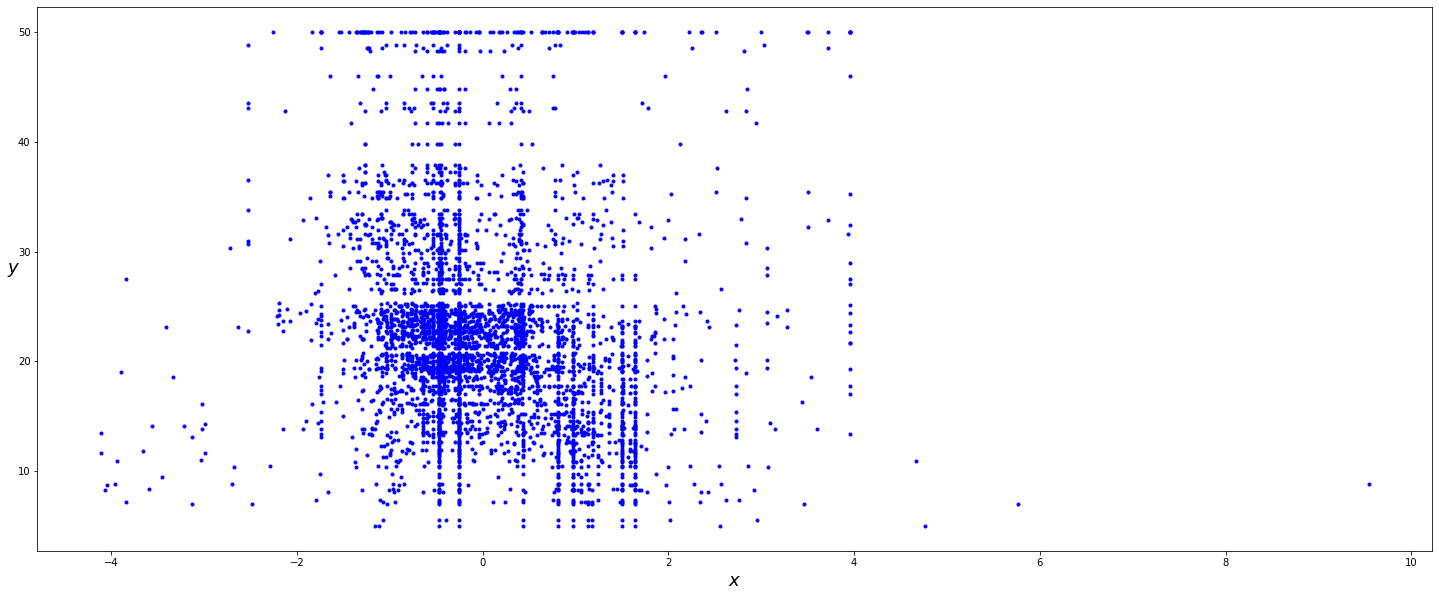

In [45]:

plt.plot(x,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)


**Cost Function & Gradients**


The equation for calculating cost function and gradients are as shown below. 
Cost$$
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta,x)^{(i)} - y^{(i)})^2 
$$
Where 
$$ h(\theta,x) = \sum_{j=0}^{d}x_j\theta_j = \theta_0+\sum_{j=1}^{d}x_j\theta_j = x.\theta$$ and  $$ x_0 =1$$
Gradient
$$
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta,x) - y^{(i)}).x_j^{(i)}
$$

$$
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta,x) - y^{(i)}).x_j^{(i)})
$$
$$
\theta_j: = \theta_j -\alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$


In [46]:
def  cal_cost(theta,x,y):
    '''
    
    Calculates the cost for given x and Y. The following shows and example of a single dimensional x
    theta = Vector of thetas 
    x     = Row of x's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''

    m = len(y)
    
    predictions = x.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

For Gradient Descent

In [47]:
def gradient_descent(x,y,theta,learning_rate=0.01,iterations=100):
    '''
    x    = Matrix of x with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1), where j is the number of dimension 
    learning_rate 
    iterations = number of  of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)

    theta_history = np.zeros((iterations,14))

    for it in range(iterations):
        
        prediction = np.dot(x,theta)   # predicted value 

        
        theta = theta -(1/m)*learning_rate*( x.T.dot((prediction - y)))

        theta_history[it,:] =theta.T

        cost_history[it]  = (1/2*m) * np.sum(np.square(prediction-y))
        
        
    return theta, cost_history, theta_history

In [48]:
lr =0.01        ##### learning rate
n_iter = 1000   ##### Number of iterations

theta = np.random.randn(14,1)

x_b = np.c_[np.ones((len(x),1)),x]  # where x0 = 1 [1, x_value]
theta,cost_history,theta_history = gradient_descent(x_b,y,theta,lr,n_iter)

In [49]:
print('theta is',theta)
print('cost_history is',cost_history)
print('theta history is', theta_history)

theta is [[22.76783583]
 [-0.27061831]
 [ 1.02884955]
 [ 0.21504842]
 [ 0.91901958]
 [-1.48490537]
 [ 2.67972411]
 [-0.14890505]
 [-2.89858771]
 [ 2.34923796]
 [-1.77875674]
 [-1.73739082]
 [ 1.02324481]
 [-4.32960289]]
cost_history is [30344361.64199654 29528141.43276549 28756534.90408067 28025266.74426438
 27330551.51847495 26669035.53516029 26037745.65314032 25434044.19981778
 24855589.27017074 24300299.76348137 23766324.59162131 23252015.56039066
 22755903.48499537 22276677.15321139 21813164.79597742 21364317.7658285
 20929196.15939251 20506956.15170018 20096838.83781912 19698160.40176427
 19310303.45415651 18932709.39904953 18564871.70702692 18206329.98636024
 17856664.75695164 17515492.84317085 17182463.31172269 16857253.88950787
 16539567.80421234 16229130.99720337 15925689.66433575 15629008.08557624
 15338866.7090255  15055060.45902889 14777397.24168899 14505696.62428021
 14239788.66787355 13979512.89495085 13724717.37596392 13475257.92071031
 13230997.36208442 12991804.9212478

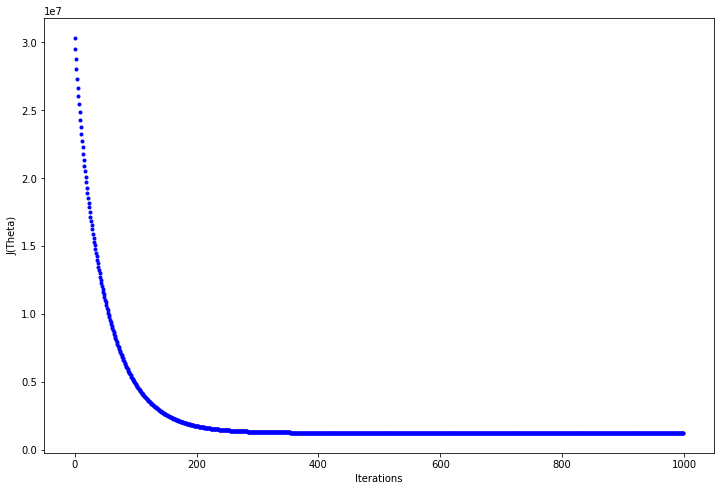

In [50]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

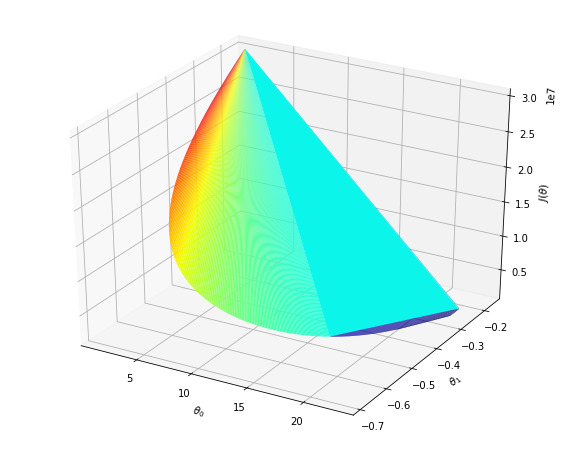

In [51]:
theta_0 = theta_history[:,0]
theta_1 = theta_history[:,1]
Z = cost_history

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection='3d')
ax.plot_trisurf(theta_0, theta_1, Z, cmap=plt.cm.jet, linewidth=0.01)
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta)$')
plt.show()